In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.style.use('seaborn-white')

# read annotation file
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')
hypo = gold_anno.loc[gold_anno['hypo_nr']==True, 'cluster']
card = gold_anno.loc[gold_anno['strict_best_ARO'].notnull(), 'cluster']

#
from glob import glob
abx_list = [x.split('/')[-1].split('_')[0] for x in glob('/home/hermuba/data0118/scoary/*.results.csv')]

def read_scoary(abx):
    fname = '~/data0118/scoary/{}_12_09_2019_0534.results.csv'.format(abx)
    df = pd.read_csv(fname, header = 0, index_col = 0)
    return(df)


def Volcano(abx):
    f,ax = plt.subplots()

    scoary = read_scoary(abx)
    scoary.replace(np.inf, scoary['Odds_ratio'].max()).replace(-np.inf,scoary['Odds_ratio'].min())
    
    scoary['log2 Odds ratio'] = np.log2(scoary['Odds_ratio'])
    scoary['-log10 P-value'] = -np.log(scoary['Bonferroni_p'])
    scoary.plot(kind = 'scatter', x = 'log2 Odds ratio', y = '-log10 P-value', color = 'grey', ax = ax)

    # label card genes
    scoary.loc[scoary.index.isin(hypo)].plot(kind = 'scatter', x = 'log2 Odds ratio', y = '-log10 P-value', color = 'salmon', ax = ax, label = 'Hypothetical Proteins')
    
    card_sco = scoary.loc[scoary.index.isin(card)]
    card_sco.plot(kind = 'scatter', x = 'log2 Odds ratio', y = '-log10 P-value', color = 'turquoise', ax = ax, label = 'CARD')
    
    to_lbl = card_sco.loc[card_sco['-log10 P-value']>card_sco['-log10 P-value'].max()*0.8]
    for index,row in to_lbl.iterrows():
        
        aro_name = gold_anno.loc[gold_anno['cluster']==index, 'strict_best_ARO']
        
        ax.text(x = row['log2 Odds ratio'], y = row['-log10 P-value'], s = aro_name.values[0])
    
    
    ax.set_title('{} Resistant Associated Genes'.format(abx.capitalize()))
    plt.legend()
    f.savefig('/home/hermuba/data0118/fig/scoary_volcano/{}.pdf'.format(abx), dpi = 300)

/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
posx and posy should be finite values
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
posx and posy should be finite values
/hom

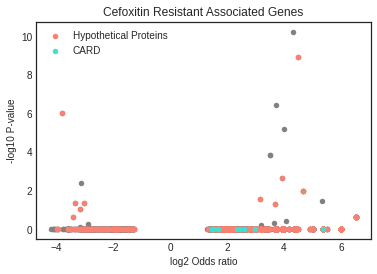

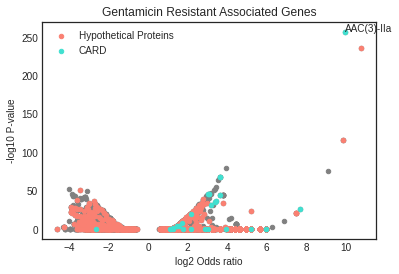

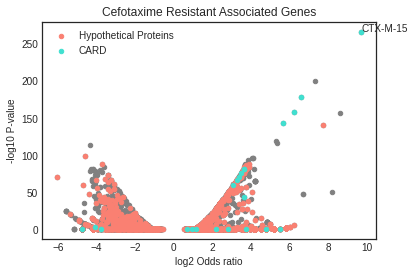

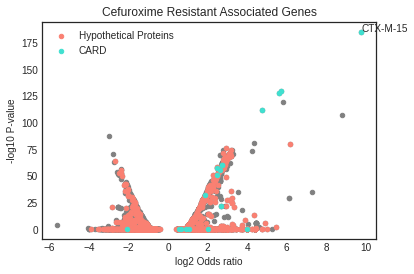

posx and posy should be finite values
posx and posy should be finite values


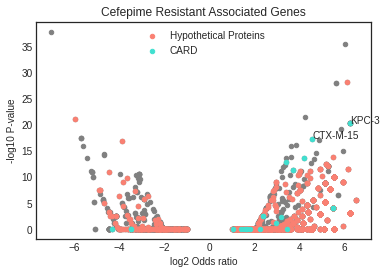

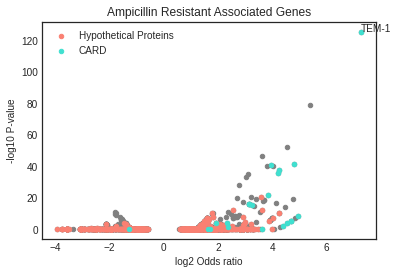

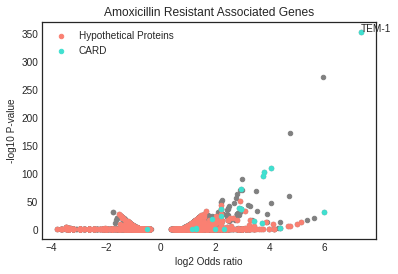

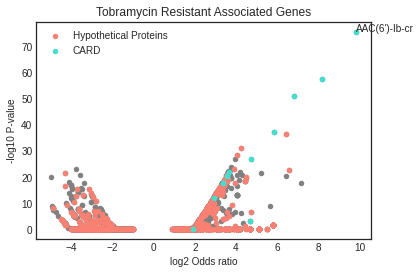

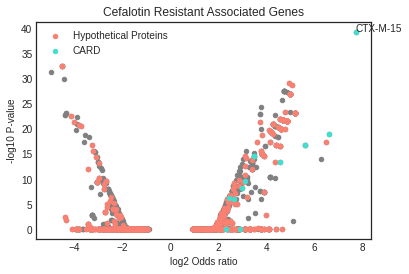

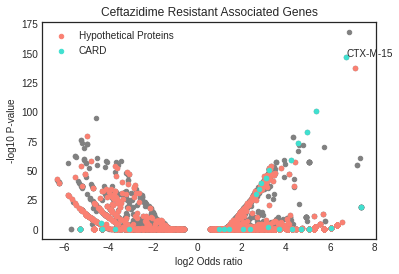

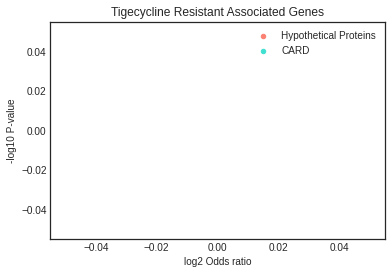

posx and posy should be finite values
posx and posy should be finite values


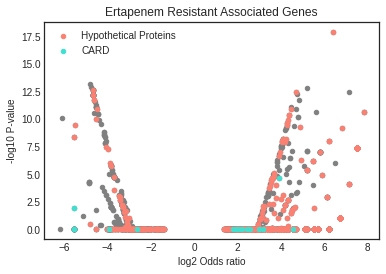

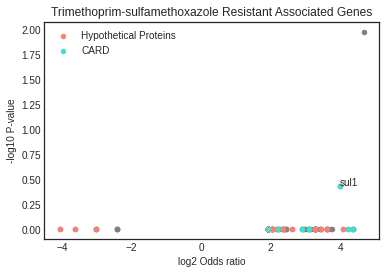

posx and posy should be finite values
posx and posy should be finite values


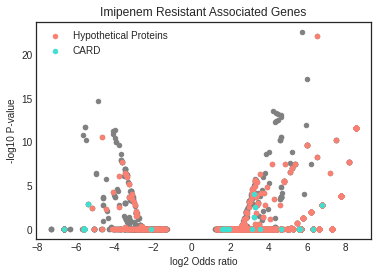

posx and posy should be finite values
posx and posy should be finite values


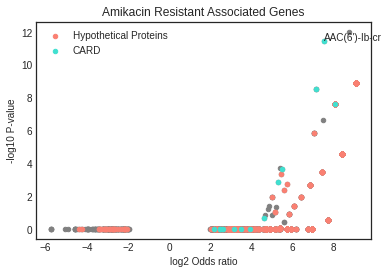

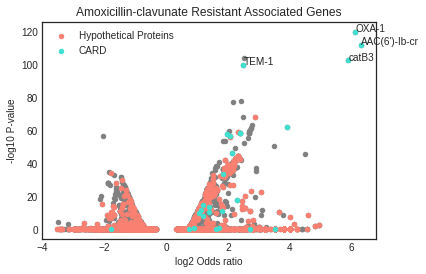

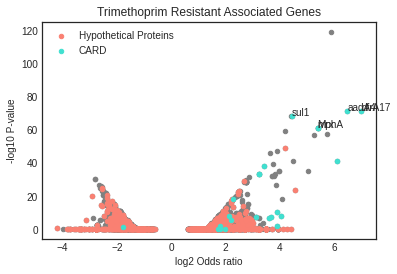

posx and posy should be finite values
posx and posy should be finite values


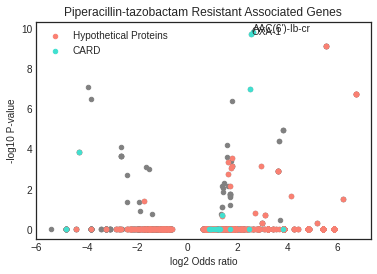

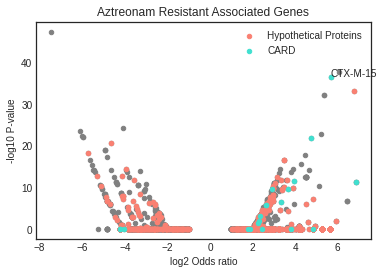

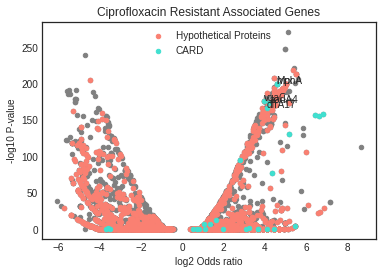

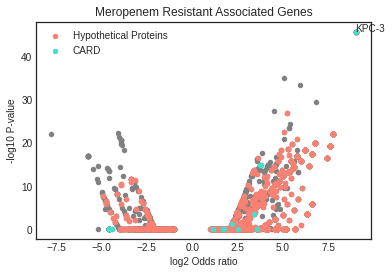

In [8]:
for a in abx_list:
    Volcano(a)

In [3]:
df = read_scoary('meropenem')

In [4]:
df.loc[(df['Odds_ratio']>8) & (df['Bonferroni_p']<0.01)]

,1328432.3,1328433.3,Number_pos_present_in,Number_neg_present_in,Number_pos_not_present_in,Number_neg_not_present_in,Sensitivity,Specificity,Odds_ratio,Naive_p,Bonferroni_p,Benjamini_H_p,Max_Pairwise_comparisons,Max_supporting_pairs,Max_opposing_pairs,Best_pairwise_comp_p,Worst_pairwise_comp_p
Gene,,,,,,,,,,,,,,,,,
Cluster 506,0,1,21,1,18,440,53.846154,99.773243,513.333333,5.197562e-25,1.252508e-20,2.087514e-21,5,4,1,0.375000,0.375
Cluster 2366,0,1,21,1,18,440,53.846154,99.773243,513.333333,5.197562e-25,1.252508e-20,2.087514e-21,5,4,1,0.375000,0.375
Cluster 4486,0,1,21,1,18,440,53.846154,99.773243,513.333333,5.197562e-25,1.252508e-20,2.087514e-21,5,4,1,0.375000,0.375
Cluster 7861,0,1,21,1,18,440,53.846154,99.773243,513.333333,5.197562e-25,1.252508e-20,2.087514e-21,5,4,1,0.375000,0.375
Cluster 10177,0,1,21,1,18,440,53.846154,99.773243,513.333333,5.197562e-25,1.252508e-20,2.087514e-21,5,4,1,0.375000,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cluster 7123,0,0,12,17,27,424,30.769231,96.145125,11.084967,2.907469e-07,7.006419e-03,7.943786e-06,2,1,2,0.500000,1.000
Cluster 5055,1,1,38,269,1,172,97.435897,39.002268,24.297398,3.424347e-07,8.251991e-03,9.261494e-06,5,4,1,0.375000,0.375
Cluster 1445,0,0,8,4,31,437,20.512821,99.092971,28.193548,3.631008e-07,8.750003e-03,9.787475e-06,5,2,4,0.375000,1.000


In [10]:
gold_anno.loc[]

,cog_ID,cog_category,cluster,count,core,loose_best_ARO,loose_ARO,strict_best_ARO,strict_ARO,is_card,resfam,aclame_title,is_aclame,nr,hypo_nr,drug_target,is_drug_target,GO,pathway,domain
562.10576.con.0001_191|562.10576,NaN,NaN,Cluster 21552,4.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,False,WP_029490538.1 XRE family transcriptional regu...,NaN,NaN,False,{GO:0003677},NaN,"{IPR001387, IPR010982}"
562.10576.con.0001_340|562.10576,NaN,NaN,Cluster 25881,2.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,False,BAX17271.1 mannitol-specific cryptic phosphotr...,NaN,NaN,False,NaN,{Reactome: R-HSA-425381},{IPR016152}
562.10576.con.0001_510|562.10576,COG3025,S,Cluster 4549,1577.0,True,NaN,NaN,NaN,NaN,False,NaN,NaN,False,WP_000046247.1 MULTISPECIES: inorganic triphos...,NaN,NaN,False,NaN,{Reactome: R-HSA-196819},"{IPR007899, IPR033469, IPR023577}"
562.10576.con.0001_61|562.10576,NaN,NaN,Cluster 9352,808.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,False,RDQ34329.1 hypothetical protein C4A40_03306 [E...,True,NaN,False,NaN,NaN,NaN
562.10576.con.0002_214|562.10576,COG1309,K,Cluster 14599,1579.0,True,NaN,NaN,NaN,NaN,False,NaN,NaN,False,EHO00211.1 HTH-type transcriptional repressor ...,NaN,NaN,False,{GO:0003677},NaN,"{IPR009057, IPR001647, IPR011075, IPR036271}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMWW01000478_2|562.19090,NaN,NaN,Cluster 31485,1.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN
NMWW01000488_2|562.19090,NaN,NaN,Cluster 17083,3.0,False,NaN,NaN,NaN,NaN,False,NaN,protein:proph:172670 Length: 188 # NCBI annota...,True,WP_086259003.1 hypothetical protein [Escherich...,True,NaN,False,NaN,NaN,{IPR003615}
NMWW01000488_3|562.19090,NaN,NaN,Cluster 17008,660.0,False,NaN,NaN,NaN,NaN,False,NaN,protein:vir:10248 Length: 175 # NCBI annotatio...,True,WP_094396063.1 phage N-6-adenine-methyltransfe...,NaN,NaN,False,"{GO:0003677, GO:0009007, GO:0032775}",NaN,{IPR008593}
NMWW01000488_6|562.19090,COG0639,T,Cluster 3483,66.0,False,NaN,NaN,NaN,NaN,False,NaN,protein:vir:105410 Length: 203 # NCBI annotati...,True,WP_001108062.1 recombination protein NinG [Esc...,NaN,NaN,False,NaN,NaN,"{IPR029052, IPR008713}"
